In [1]:
from LIMxCMBL.init import *

In [2]:
from tqdm import trange

In [3]:
c1 = plt.cm.rainbow(np.linspace(0, 1, len(deltas)))[::-1]
c2 = plt.cm.rainbow(np.linspace(0, 1, len(chibs)))

In [4]:
print(chibs)

[1.00000000e+01 5.29752125e+01 9.59504250e+01 1.38925637e+02
 1.81900850e+02 2.24876062e+02 2.67851275e+02 3.10826487e+02
 3.53801700e+02 3.96776912e+02 4.39752125e+02 4.82727337e+02
 5.25702550e+02 5.68677762e+02 6.11652975e+02 6.54628187e+02
 6.97603400e+02 7.40578612e+02 7.83553825e+02 8.26529037e+02
 8.69504250e+02 9.12479462e+02 9.55454675e+02 9.98429887e+02
 1.04140510e+03 1.08438031e+03 1.12735552e+03 1.17033074e+03
 1.21330595e+03 1.25628116e+03 1.29925637e+03 1.34223159e+03
 1.38520680e+03 1.42818201e+03 1.47115722e+03 1.51413244e+03
 1.55710765e+03 1.60008286e+03 1.64305807e+03 1.68603329e+03
 1.72900850e+03 1.77198371e+03 1.81495892e+03 1.85793414e+03
 1.90090935e+03 1.94388456e+03 1.98685977e+03 2.02983499e+03
 2.07281020e+03 2.11578541e+03 2.15876062e+03 2.20173584e+03
 2.24471105e+03 2.28768626e+03 2.33066147e+03 2.37363669e+03
 2.41661190e+03 2.45958711e+03 2.50256232e+03 2.54553754e+03
 2.58851275e+03 2.63148796e+03 2.67446317e+03 2.71743839e+03
 2.76041360e+03 2.803388

In [5]:
c1.shape

(128, 4)

  0%|          | 0/100 [00:00<?, ?it/s]

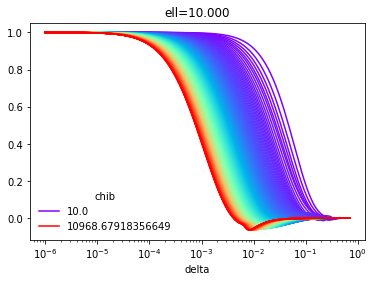

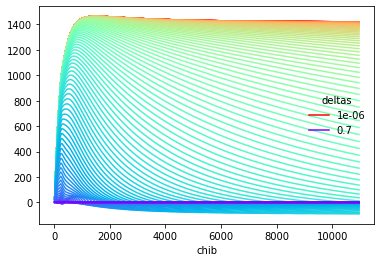

  1%|          | 1/100 [00:01<02:33,  1.55s/it]

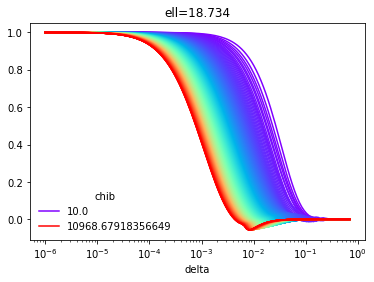

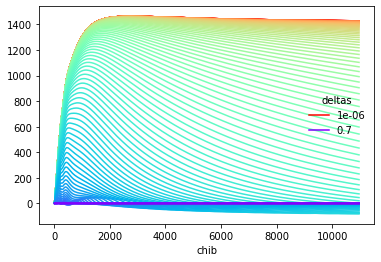

 11%|█         | 11/100 [00:02<00:20,  4.37it/s]

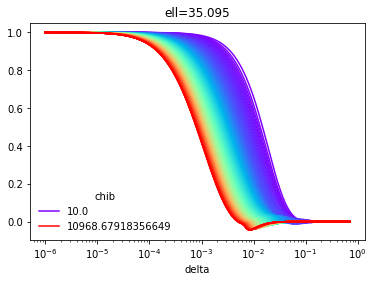

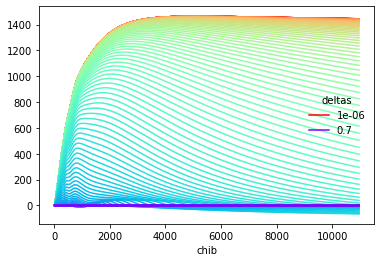

 21%|██        | 21/100 [00:04<00:14,  5.63it/s]

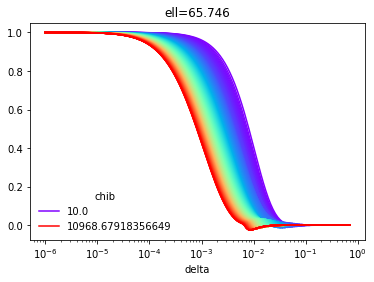

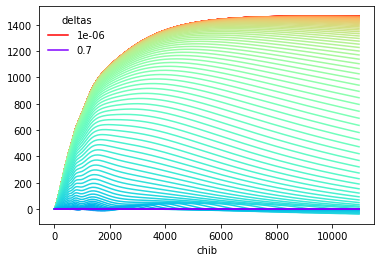

 31%|███       | 31/100 [00:05<00:10,  6.78it/s]

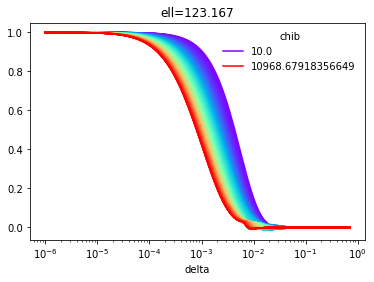

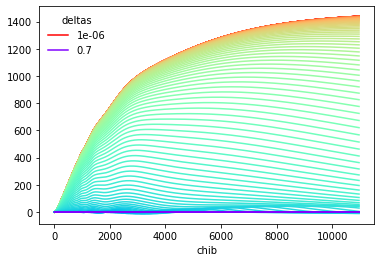

 41%|████      | 41/100 [00:06<00:07,  7.75it/s]

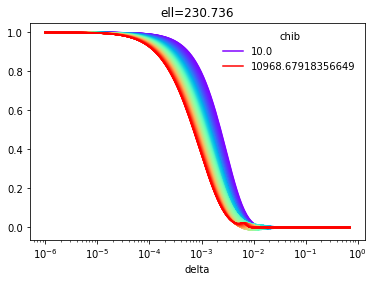

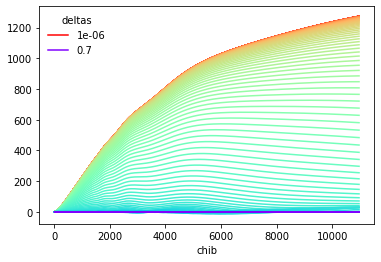

 51%|█████     | 51/100 [00:07<00:05,  8.68it/s]

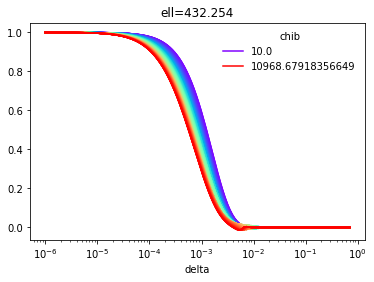

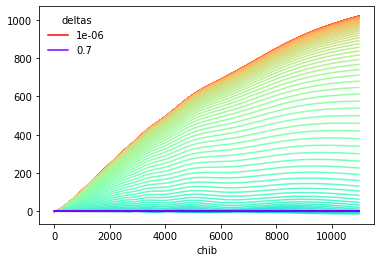

 61%|██████    | 61/100 [00:08<00:04,  9.18it/s]

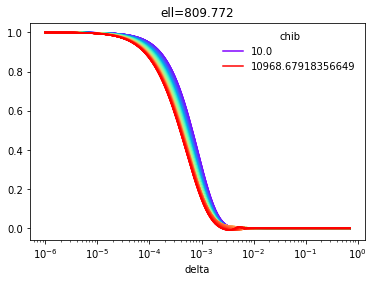

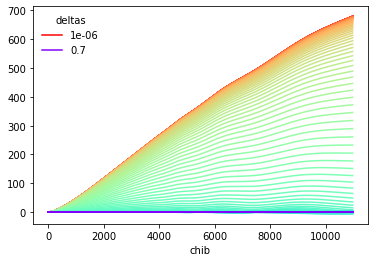

 71%|███████   | 71/100 [00:09<00:03,  9.55it/s]

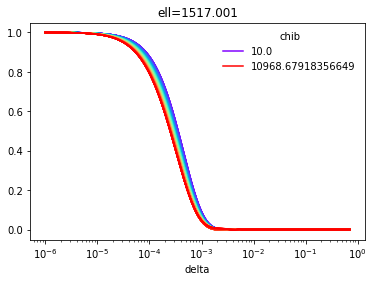

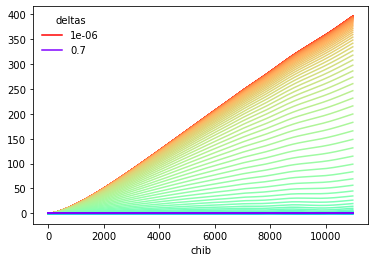

 81%|████████  | 81/100 [00:10<00:01,  9.72it/s]

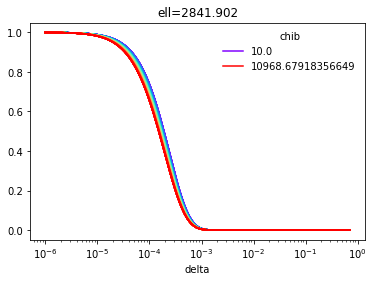

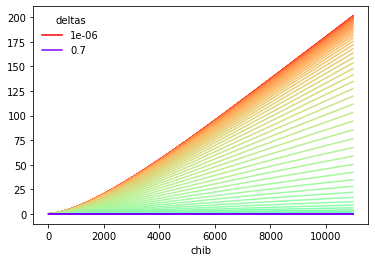

100%|██████████| 100/100 [00:11<00:00,  8.96it/s]


In [6]:
oup = np.zeros((len(ells), len(chibs), len(deltas)), dtype=np.float128)
for ell_idx in trange(len(ells)):
    ell = ells[ell_idx]
    oup_fname = '/scratch/users/delon/LIMxCMBL/dkparp_integral/ell_%.8f.npy'%(ell)
    oup[ell_idx] = np.load(oup_fname)
    if(ell_idx % 10 !=0):
        continue
#     plt.figure(figsize=(8.5,11))
    for chib_idx, c in enumerate(c2):
        plt.plot(deltas, 
                 oup[ell_idx][chib_idx]/np.max(oup[ell_idx][chib_idx], axis=-1), 
                 label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
                 c=c)
    plt.xlabel('delta')
    plt.xscale('log')
    plt.legend(frameon=False, title='chib')
    plt.title('ell=%.3f'%(ell))
    plt.show()
    
#     plt.figure(figsize=(8.5,22))
    for i, c in enumerate(c1):
        plt.plot(chibs, 
                 oup[ell_idx,:,i], 
                 label=deltas[i] if (i ==0 or i == len(c1)-1) else None, 
                 c=c)

    plt.xlabel('chib')
    plt.legend(frameon=False, title='deltas')
    plt.show()


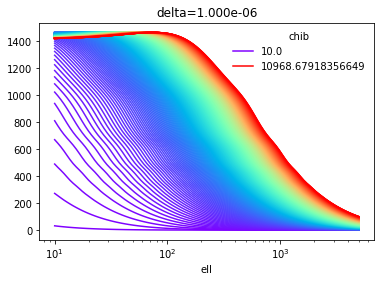

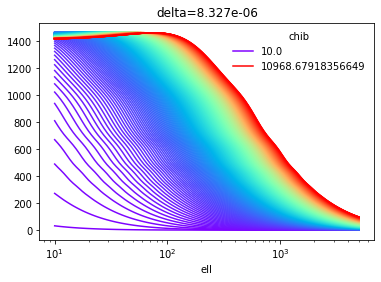

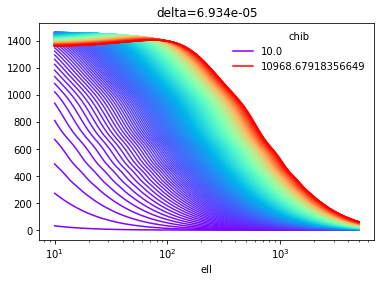

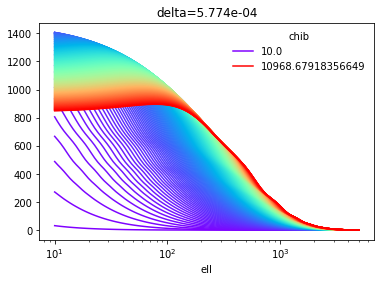

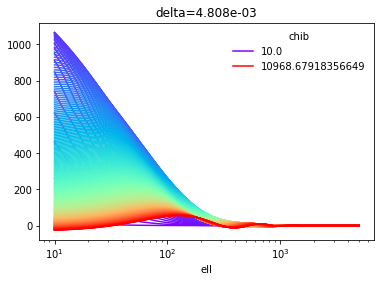

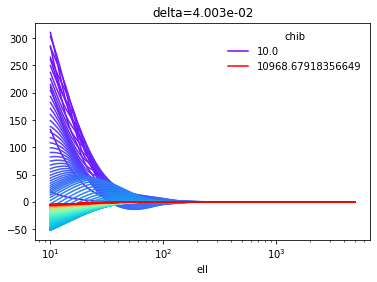

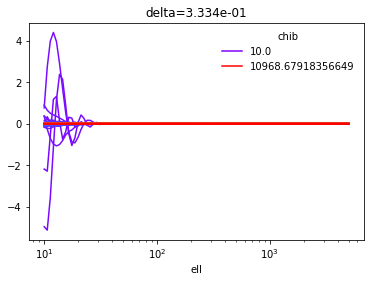

In [7]:
for delta_idx in range(len(deltas)):
    if(delta_idx % 20 != 0):
        continue
    for chib_idx in range(len(chibs)):
        plt.plot(ells, 
                 oup[:,chib_idx,delta_idx], 
                 label=chibs[chib_idx] if (chib_idx ==0 or chib_idx == len(c2)-1) else None, 
                 c=c2[chib_idx])
    plt.legend(frameon=False, title='chib', loc='upper right')
    plt.xlabel('ell')
    plt.xscale('log')
    plt.title('delta=%.3e'%(deltas[delta_idx]))
    plt.show()

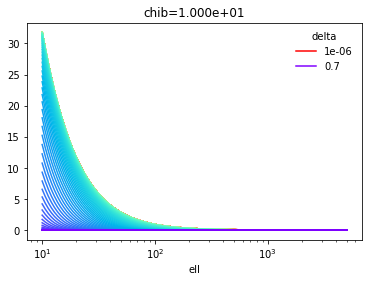

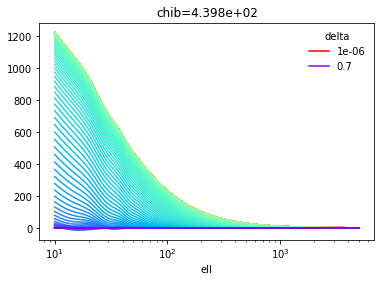

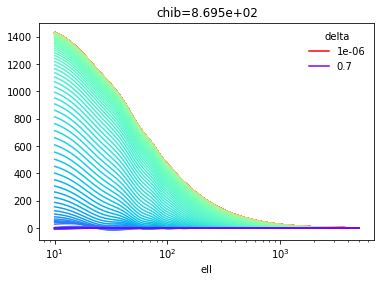

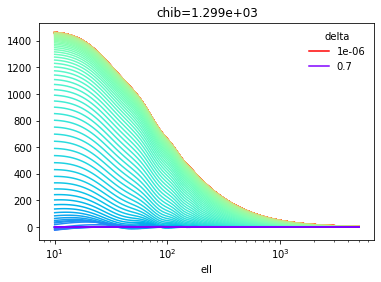

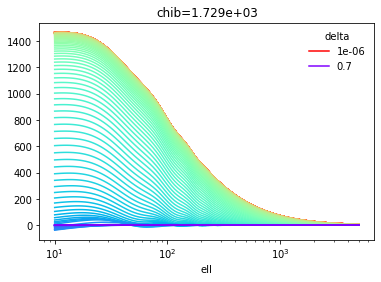

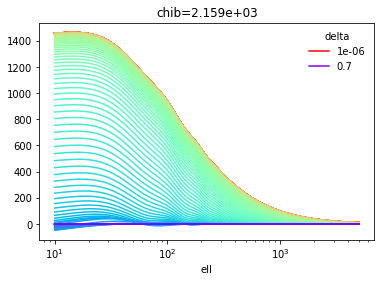

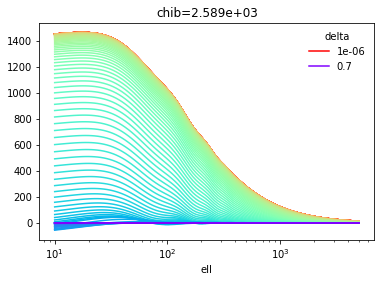

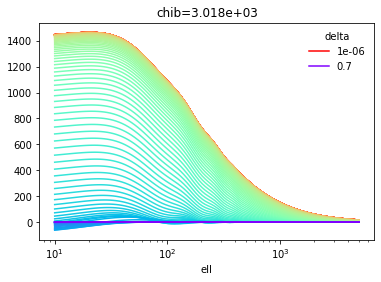

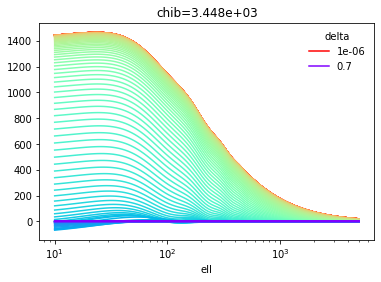

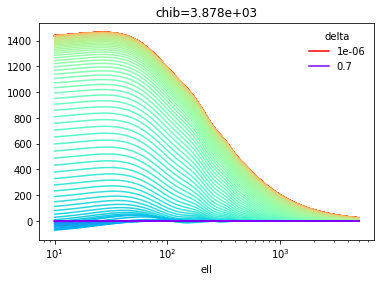

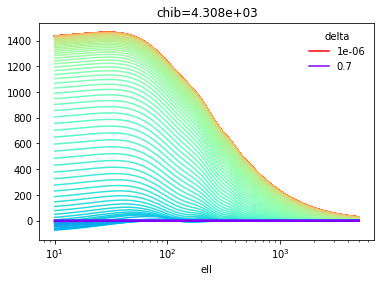

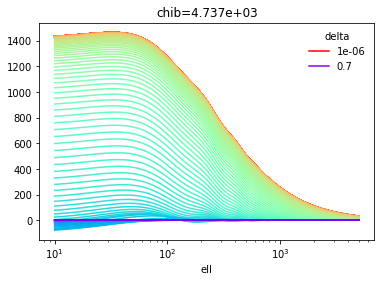

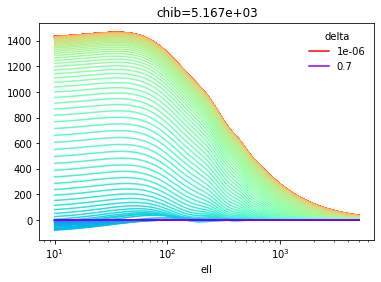

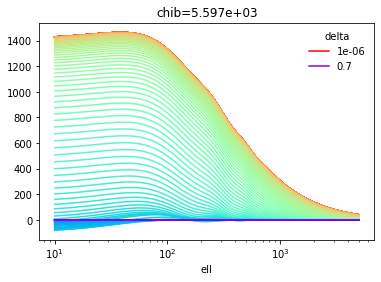

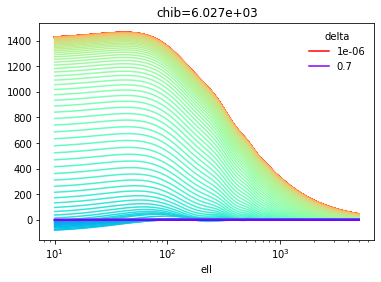

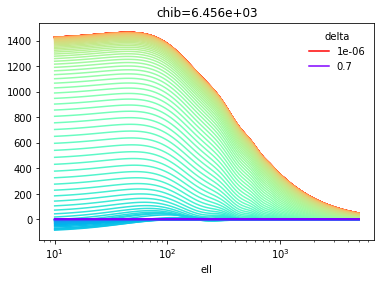

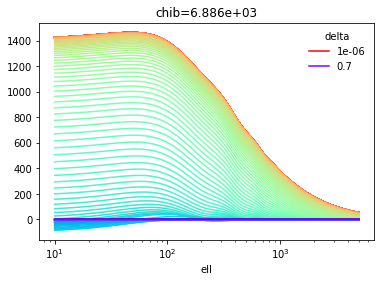

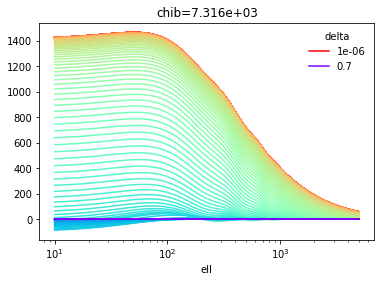

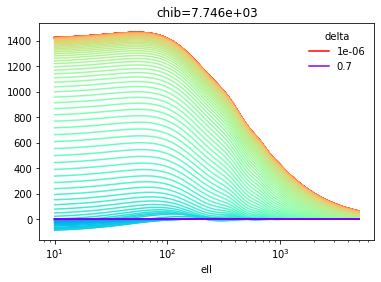

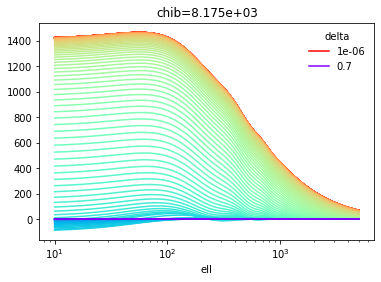

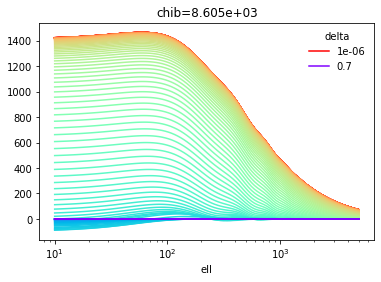

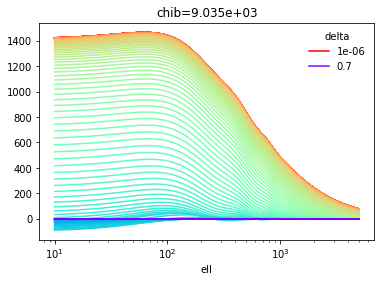

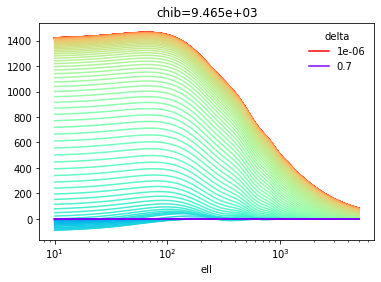

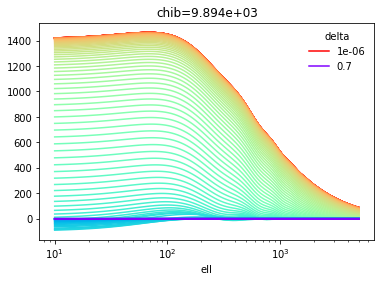

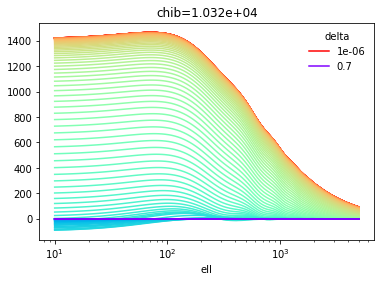

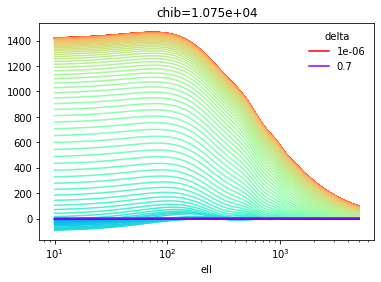

In [8]:
for chib_idx in range(len(chibs)):
    if(chib_idx % 10 != 0):
        continue
    for delta_idx in range(len(deltas)):
        plt.plot(ells, 
                 oup[:,chib_idx,delta_idx], 
                 label=deltas[delta_idx] if (delta_idx ==0 or delta_idx == len(c1)-1) else None, 
                 c=c1[delta_idx])
    plt.legend(frameon=False, title='delta', loc='upper right')
    plt.xlabel('ell')
    plt.xscale('log')
    plt.title('chib=%.3e'%(chibs[chib_idx]))
    plt.show()

In [9]:
oup.shape

(100, 256, 128)

In [10]:
np.save('/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/inner_dkparp_integral.npy', oup)